In [24]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('wpbc.csv')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Text(0, 0.5, 'Numbers')

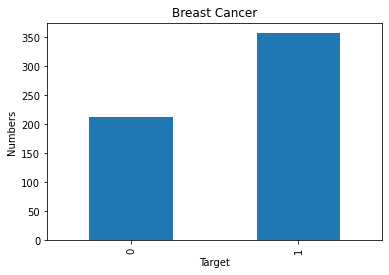

In [9]:
count_target = pd.value_counts(data['target'],sort=True).sort_index()
count_target.plot(kind='bar')
plt.title('Breast Cancer')
plt.xlabel('Target')
plt.ylabel('Numbers')

In [23]:
X = data.iloc[:,data.columns != 'target']
y = data.iloc[:,data.columns == 'target']
# 得到所有 0 的样本的索引
number_records_fraud = len(data[data.target == 0])
fraud_index = np.array(data[data.target==0].index)

# 得到所有1 的样本的索引
normal_indices = data[data.target==1].index

# 在1样本中随机采样出指定个数的样本，并取其索引
random_normal_indeices = np.random.choice(normal_indices,number_records_fraud,replace=False)
random_normal_indeices = np.array(random_normal_indeices)

# 下采样的新版本数据
under_sample_indices = np.concatenate([fraud_index,random_normal_indeices])

under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'target']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
376,1
510,1
476,1
102,1


In [25]:
X_train,X_test,y_tarin,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train_undersample,X_test_undersample,y_tarin_undersample,y_test_undersample = train_test_split(X_undersample,y_undersample,test_size=0.3,random_state=0)


In [26]:
from sklearn.linear_model import LogisticRegression        #  逻辑回归
from sklearn.model_selection import KFold,cross_val_score  #  验证方法
from sklearn.metrics import confusion_matrix,recall_score,classification_report  # 评估指标